# 490 GeoSpatial Data Science Final: Whale Migration: Temperature Analysis
### Gage Doyle
#### 05/17/2024


In [14]:
import numpy as np
import rasterio
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import netCDF4
import h5netcdf
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [43]:
#Read in the dataset using xarray (xarray was recommened for climate rasters and '.nc')
xds = xr.open_dataset('C:/Users/gaged/Desktop/SDS 490 Data/Final Project/migration/Temperature/Data/NOAAGlobalTemp_v5.0.0_gridded_s188001_e202212_c20230108T133308.nc')

In [16]:
# define spatial extent
lat_min, lat_max = 4.606, 53.148
lon_min, lon_max = -165.662, 176.676

clipped_extent = xds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))


In [17]:
#define temporal extent
xds_2008 = clipped_extent.sel(time=slice('2008-01-01', '2008-12-31'))
xds_1999 = clipped_extent.sel(time=slice('1999-01-01', '1999-12-31'))


In [44]:
# Find Avg Sea-Surface temp Anomoly for '08 and '99
avg_sst_2008 = xds_2008.mean(dim='time')
avg_sst_1999 = xds_1999.mean(dim='time')


In [45]:
# Convert to pandas df just incase I need it
df08= avg_sst_2008.to_dataframe()
df99= avg_sst_1999.to_dataframe()

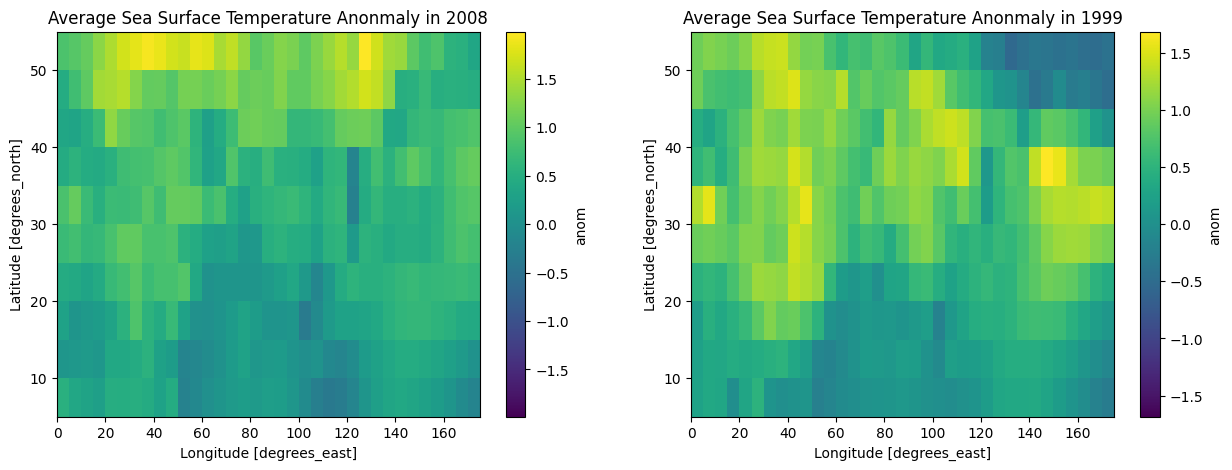

In [46]:
# Plot Avg SST Anomoly for each time window
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

avg_sst_2008['anom'].plot(ax=ax[0], cmap='viridis')
ax[0].set_title('Average Sea Surface Temperature Anonmaly in 2008')

avg_sst_1999['anom'].plot(ax=ax[1], cmap='viridis')
ax[1].set_title('Average Sea Surface Temperature Anonmaly in 1999')

plt.show() 
